In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('iris.csv')
def classMaking(value):
    if value=='setosa':
        return 0
    if value=='versicolor':
        return 1
    return 2
data['species']=data['species'].apply(classMaking)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# A

In [19]:
meanstore=[]
for i in range(0,3):
    meanstore.append(np.mean(data[data['species']==i].iloc[:,0:4],axis=0))
    print("Mean of class",i," : ",meanstore[-1])
    print("Std of class",i," : ",np.std(data[data['species']==i].iloc[:,0:4],axis=0))

Mean of class 0  :  sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64
Std of class 0  :  sepal_length    0.348947
sepal_width     0.377195
petal_length    0.171767
petal_width     0.106132
dtype: float64
Mean of class 1  :  sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64
Std of class 1  :  sepal_length    0.510983
sepal_width     0.310644
petal_length    0.465188
petal_width     0.195765
dtype: float64
Mean of class 2  :  sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64
Std of class 2  :  sepal_length    0.629489
sepal_width     0.319255
petal_length    0.546348
petal_width     0.271890
dtype: float64


In [41]:
for i in range(len(meanstore)-1):
    for j in range(i+1,len(meanstore)):
        print("The distance between mean vectors of class ",i ,"and","class ",j,"is",np.linalg.norm(meanstore[j]-meanstore[i]))

The distance between mean vectors of class  0 and class  1 is 3.2051745662288034
The distance between mean vectors of class  0 and class  2 is 4.752591714001951
The distance between mean vectors of class  1 and class  2 is 1.6204888151419004


# A2

1.1986666666666668
0.5824143176733783


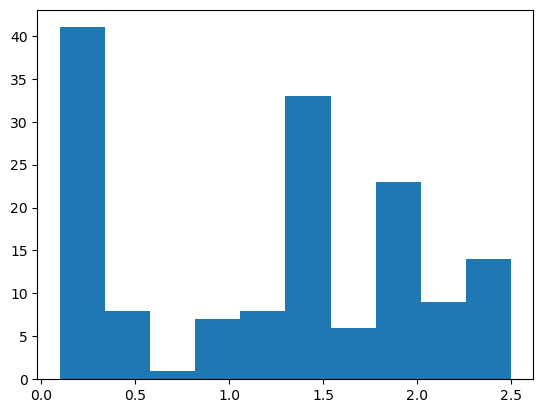

In [40]:
plt.hist(data['petal_width'])
print(data['petal_width'].mean())
print(data['petal_width'].std()**2)

# A3

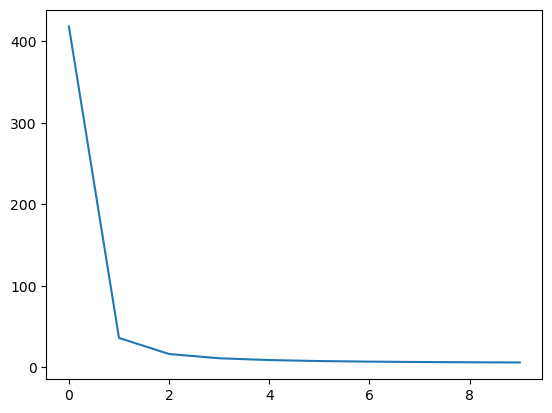

In [44]:
answer=[]
for i in range(1,11):
    answer.append(sum(abs(data['sepal_length']-data['sepal_width'])**i)**(1/i))
plt.plot(range(0,10),answer)

# A4

In [54]:
from sklearn.model_selection import train_test_split
X=data[(data['species']==0) | (data['species']==1)].drop(columns=['species'])
Y=data[(data['species']==0) | (data['species']==1)]['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

# A5

In [71]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# A6

In [72]:
neigh.score(x_test,y_test)

1.0

# A7

In [75]:
neigh.predict(x_test)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

# A8

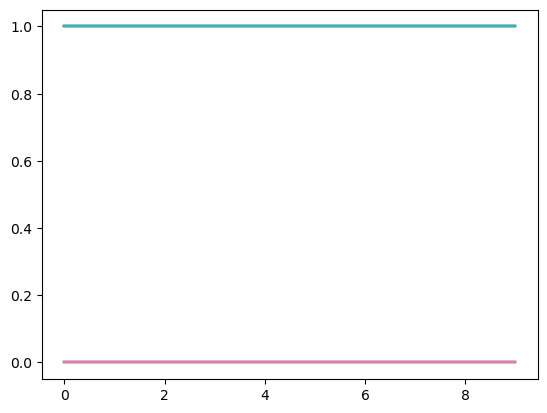

In [77]:
acc=[]
for i in range(1,11):
    neigh=KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train,y_train) 
    acc.append(neigh.predict(x_test))
plt.plot(range(10),acc)

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        34

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



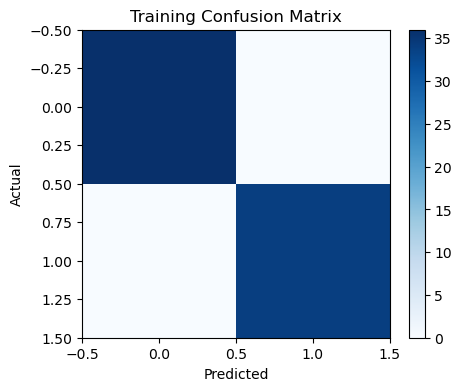

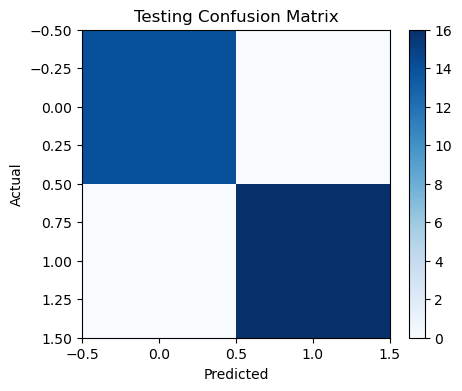

The model seems to be Regularly fitted.


In [80]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_train_pred = neigh.predict(x_train)
y_test_pred = neigh.predict(x_test)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Training Classification Report:\n", train_report)
print("Testing Classification Report:\n", test_report)
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(train_cm, "Training Confusion Matrix")
plot_confusion_matrix(test_cm, "Testing Confusion Matrix")
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
if train_acc > 0.95 and test_acc < 0.80:
    print("The model is likely Overfitting.")
elif train_acc < 0.70 and test_acc < 0.70:
    print("The model is likely Underfitting.")
else:
    print("The model seems to be Regularly fitted.")